XTC and aggressively quantised compressed Zarr (3 digits precision, GROMACS default) in terms of file size

Also @Lawson could I have a  < 50 Mb aggressively quantised zarrtraj file? Or even better an S3 link to one?



Compare yiip filesize between xtc and zarrtraj with max compression and 3 digits of precision

In [2]:
from zarrtraj import *
import MDAnalysis as mda
import MDAnalysisData
import zarr
import h5py
import numcodecs
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

u_yiip = mda.Universe("../notebook_data_tmp/yiip_equilibrium/YiiP_system.pdb", "../notebook_data_tmp/yiip_equilibrium/YiiP_system_90ns_center.xtc")

# Write to zarrtraj with (1, n_atoms, 3) chunks
filters = [numcodecs.Quantize(digits=3, dtype='f4')]
compressor = numcodecs.Blosc(cname='zstd', clevel=9)
with mda.Writer("../notebook_data_tmp/filesize_benchmarks/yiip_1_frame.zarrtraj", u_yiip.trajectory.n_atoms,
                n_frames=u_yiip.trajectory.n_frames, chunks=(1, u_yiip.trajectory.n_atoms, 3),
                compressor=compressor, filters=filters) as w:
    for ts in u_yiip.trajectory:
        w.write(u_yiip)

# Write to zarrtraj with (10, n_atoms, 3) chunks
with mda.Writer("../notebook_data_tmp/filesize_benchmarks/yiip_10_frame.zarrtraj", u_yiip.trajectory.n_atoms, 
                n_frames=u_yiip.trajectory.n_frames, chunks=(10, u_yiip.trajectory.n_atoms, 3),
                compressor=compressor, filters=filters) as w:
    for ts in u_yiip.trajectory:
        w.write(u_yiip)

# Write to zarrtraj with (100, n_atoms, 3) chunks
with mda.Writer("../notebook_data_tmp/filesize_benchmarks/yiip_100_frame.zarrtraj", u_yiip.trajectory.n_atoms,
                n_frames=u_yiip.trajectory.n_frames, chunks=(100, u_yiip.trajectory.n_atoms, 3),
                compressor=compressor, filters=filters) as w:
    for ts in u_yiip.trajectory:
        w.write(u_yiip)

# # Write to xtc
# with mda.Writer("../notebook_data_tmp/filesize_benchmarks/yiip.xtc", u_yiip.trajectory.n_atoms) as w:
#     for ts in u_yiip.trajectory:
#         w.write(u_yiip)



/nfs/homes3/ljwoods2/.conda/envs/zarrtraj/lib/python3.11/site-packages/MDAnalysis/topology/PDBParser.py:348: UserWarning: Unknown element Z found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/nfs/homes3/ljwoods2/.conda/envs/zarrtraj/lib/python3.11/site-packages/MDAnalysis/topology/PDBParser.py:348: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/nfs/homes3/ljwoods2/.conda/envs/zarrtraj/lib/python3.11/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/nfs/homes3/ljwoods2/.conda/envs/zarrtraj/lib/python3.11/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to gu

In [3]:
def filesize(filename):
    return int(subprocess.check_output(['du','-s', filename]).split()[0].decode('utf-8'))

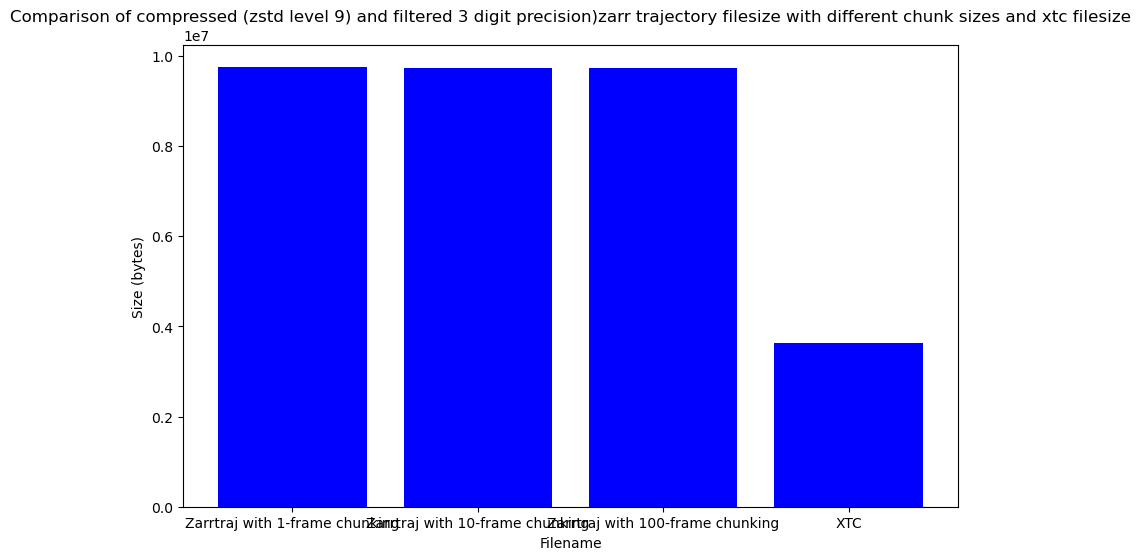

In [4]:
# File vs filesize 
import matplotlib.pyplot as plt

filesizes= [filesize("../notebook_data_tmp/filesize_benchmarks/yiip_1_frame.zarrtraj"),
            filesize("../notebook_data_tmp/filesize_benchmarks/yiip_10_frame.zarrtraj"),
            filesize("../notebook_data_tmp/filesize_benchmarks/yiip_100_frame.zarrtraj"),
            filesize("../notebook_data_tmp/filesize_benchmarks/yiip.xtc")]

filenames = ["Zarrtraj with 1-frame chunking", "Zarrtraj with 10-frame chunking", "Zarrtraj with 100-frame chunking", "XTC"]


plt.figure(figsize=(10, 6))
plt.bar(filenames, filesizes, color='blue')

plt.title('Comparison of compressed (zstd level 9) and filtered 3 digit precision)' +
          'zarr trajectory filesize with different chunk sizes and xtc filesize')
plt.xlabel('Filename')
plt.ylabel('Size (bytes)')

# Show the graph
plt.show()